In [1]:
import pandas as pd                    
import numpy as np
import  matplotlib.pyplot as plt   
import seaborn as sns                  
import sklearn
import scipy
import math

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
data=pd.read_csv(r'H2HBABBA2586.csv')   #reading CSV File
data                                    #to get the information of data set

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200711029,WEGMAN,2019-02-26 00:00:00,2019.0,1.928779e+09,2019-02-11,20190211,20190211,20190226.0,USD,RV,1.0,NaN,13734.56,20190211.0,NAA8,1.928779e+09,0
1,U001,0200762301,C&S WH associates,2019-04-25 00:00:00,2019.0,1.929114e+09,2019-04-11,20190410,20190411,20190426.0,USD,RV,1.0,NaN,11111.14,20190411.0,NAC6,1.929114e+09,0
2,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930724e+09,2020-03-31,20200331,20200331,20200415.0,USD,RV,1.0,NaN,15488.14,20200331.0,NAH4,1.930724e+09,1
3,U001,0200900909,SYSCO us,2019-05-06 00:00:00,2019.0,1.929154e+09,2019-04-18,20190416,20190418,20190503.0,USD,RV,1.0,NaN,8157.67,20190418.0,NAA8,1.929154e+09,0
4,U001,0200769623,WAL-MAR,2019-07-03 00:00:00,2019.0,1.929518e+09,2019-06-22,20190620,20190622,20190707.0,USD,RV,1.0,NaN,45057.46,20190622.0,NAH4,1.929518e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200772670,ASSOCIAT foundation,NaN,2020.0,1.930648e+09,2020-03-13,20200314,20200313,20200328.0,USD,RV,1.0,NaN,44196.80,20200313.0,NAU5,1.930648e+09,1
49996,CA02,0140106408,WAL-M trust,2019-09-23 00:00:00,2019.0,2.960577e+09,2019-09-06,20190906,20190906,20190916.0,CAD,RV,1.0,NaN,62165.85,20190906.0,CA10,2.960577e+09,0
49997,CA02,0140104440,SO corp,2019-06-28 00:00:00,2019.0,2.960554e+09,2019-06-11,20190611,20190611,20190622.0,CAD,RV,1.0,NaN,59623.48,20190612.0,CA10,2.960554e+09,0
49998,CA02,0140118172,AGR llc,2019-08-26 00:00:00,2019.0,2.960573e+09,2019-08-19,20190819,20190819,20190919.0,CAD,RV,1.0,NaN,42773.03,20190820.0,CA30,2.960573e+09,0


# Separating the data points where clear date is NULL


In [3]:
newData=pd.DataFrame(data[data["clear_date"].notnull()])     #slicing data where clear date is not null for training our model
newData.reset_index(drop=True, inplace=True)   #resetting index after removing null clear dates.
test=pd.DataFrame(data[data["clear_date"].isnull()])        #putting clear dates not null in train variable to test our model later !
test.reset_index(drop=True, inplace=True)     #resetting index of our train data serial wise.
#test
newData

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200711029,WEGMAN,2019-02-26 00:00:00,2019.0,1.928779e+09,2019-02-11,20190211,20190211,20190226.0,USD,RV,1.0,NaN,13734.56,20190211.0,NAA8,1.928779e+09,0
1,U001,0200762301,C&S WH associates,2019-04-25 00:00:00,2019.0,1.929114e+09,2019-04-11,20190410,20190411,20190426.0,USD,RV,1.0,NaN,11111.14,20190411.0,NAC6,1.929114e+09,0
2,U001,0200900909,SYSCO us,2019-05-06 00:00:00,2019.0,1.929154e+09,2019-04-18,20190416,20190418,20190503.0,USD,RV,1.0,NaN,8157.67,20190418.0,NAA8,1.929154e+09,0
3,U001,0200769623,WAL-MAR,2019-07-03 00:00:00,2019.0,1.929518e+09,2019-06-22,20190620,20190622,20190707.0,USD,RV,1.0,NaN,45057.46,20190622.0,NAH4,1.929518e+09,0
4,U001,0200741174,M B corp,2019-11-20 00:00:00,2019.0,1.930017e+09,2019-10-18,20191016,20191018,20191119.0,USD,RV,1.0,NaN,41620.08,20191018.0,NA32,1.930017e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,U001,0200762301,C&S WH corp,2019-11-08 00:00:00,2019.0,1.930049e+09,2019-10-24,20191024,20191024,20191108.0,USD,RV,1.0,NaN,133016.49,20191024.0,NAC6,1.930049e+09,0
39996,CA02,0140106408,WAL-M trust,2019-09-23 00:00:00,2019.0,2.960577e+09,2019-09-06,20190906,20190906,20190916.0,CAD,RV,1.0,NaN,62165.85,20190906.0,CA10,2.960577e+09,0
39997,CA02,0140104440,SO corp,2019-06-28 00:00:00,2019.0,2.960554e+09,2019-06-11,20190611,20190611,20190622.0,CAD,RV,1.0,NaN,59623.48,20190612.0,CA10,2.960554e+09,0
39998,CA02,0140118172,AGR llc,2019-08-26 00:00:00,2019.0,2.960573e+09,2019-08-19,20190819,20190819,20190919.0,CAD,RV,1.0,NaN,42773.03,20190820.0,CA30,2.960573e+09,0


# Preprocessing


In [4]:
[col for col in newData.columns if newData[col].isnull().sum() > 0]  #checking columns which have null 

['area_business', 'invoice_id']

In [5]:
const_cols =  [x for x in newData.columns if newData[x].nunique()<=1] #checking for constant columns (which have same value throught)
print(const_cols)

['posting_id', 'area_business', 'isOpen']


In [6]:
newData.drop(['area_business', 'posting_id'], axis='columns', inplace=True) #dropping area business and posting_id as they contain null and dont provide any info about our target variable   
newData 

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200711029,WEGMAN,2019-02-26 00:00:00,2019.0,1.928779e+09,2019-02-11,20190211,20190211,20190226.0,USD,RV,13734.56,20190211.0,NAA8,1.928779e+09,0
1,U001,0200762301,C&S WH associates,2019-04-25 00:00:00,2019.0,1.929114e+09,2019-04-11,20190410,20190411,20190426.0,USD,RV,11111.14,20190411.0,NAC6,1.929114e+09,0
2,U001,0200900909,SYSCO us,2019-05-06 00:00:00,2019.0,1.929154e+09,2019-04-18,20190416,20190418,20190503.0,USD,RV,8157.67,20190418.0,NAA8,1.929154e+09,0
3,U001,0200769623,WAL-MAR,2019-07-03 00:00:00,2019.0,1.929518e+09,2019-06-22,20190620,20190622,20190707.0,USD,RV,45057.46,20190622.0,NAH4,1.929518e+09,0
4,U001,0200741174,M B corp,2019-11-20 00:00:00,2019.0,1.930017e+09,2019-10-18,20191016,20191018,20191119.0,USD,RV,41620.08,20191018.0,NA32,1.930017e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,U001,0200762301,C&S WH corp,2019-11-08 00:00:00,2019.0,1.930049e+09,2019-10-24,20191024,20191024,20191108.0,USD,RV,133016.49,20191024.0,NAC6,1.930049e+09,0
39996,CA02,0140106408,WAL-M trust,2019-09-23 00:00:00,2019.0,2.960577e+09,2019-09-06,20190906,20190906,20190916.0,CAD,RV,62165.85,20190906.0,CA10,2.960577e+09,0
39997,CA02,0140104440,SO corp,2019-06-28 00:00:00,2019.0,2.960554e+09,2019-06-11,20190611,20190611,20190622.0,CAD,RV,59623.48,20190612.0,CA10,2.960554e+09,0
39998,CA02,0140118172,AGR llc,2019-08-26 00:00:00,2019.0,2.960573e+09,2019-08-19,20190819,20190819,20190919.0,CAD,RV,42773.03,20190820.0,CA30,2.960573e+09,0


In [7]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           40000 non-null  object 
 1   cust_number             40000 non-null  object 
 2   name_customer           40000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           40000 non-null  float64
 5   doc_id                  40000 non-null  float64
 6   posting_date            40000 non-null  object 
 7   document_create_date    40000 non-null  int64  
 8   document_create_date.1  40000 non-null  int64  
 9   due_in_date             40000 non-null  float64
 10  invoice_currency        40000 non-null  object 
 11  document type           40000 non-null  object 
 12  total_open_amount       40000 non-null  float64
 13  baseline_create_date    40000 non-null  float64
 14  cust_payment_terms      40000 non-null

### Date Time Covnversion

In [8]:
newData['clear_date']=pd.to_datetime(newData['clear_date'])
#newData['posting_date' ]=newData['posting_date'].str.replace("-","").astype("int")
newData['posting_date']=pd.to_datetime(newData['posting_date'])
newData['baseline_create_date' ]=pd.to_datetime(newData['baseline_create_date'],format='%Y%m%d')
newData['document_create_date.1' ]=pd.to_datetime(newData['document_create_date.1'],format='%Y%m%d')
newData['due_in_date' ]=pd.to_datetime(newData['due_in_date'],format='%Y%m%d')
newData['document_create_date' ]=pd.to_datetime(newData['document_create_date'],format='%Y%m%d')

newData.info()
newData


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           40000 non-null  object        
 1   cust_number             40000 non-null  object        
 2   name_customer           40000 non-null  object        
 3   clear_date              40000 non-null  datetime64[ns]
 4   buisness_year           40000 non-null  float64       
 5   doc_id                  40000 non-null  float64       
 6   posting_date            40000 non-null  datetime64[ns]
 7   document_create_date    40000 non-null  datetime64[ns]
 8   document_create_date.1  40000 non-null  datetime64[ns]
 9   due_in_date             40000 non-null  datetime64[ns]
 10  invoice_currency        40000 non-null  object        
 11  document type           40000 non-null  object        
 12  total_open_amount       40000 non-null  float6

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200711029,WEGMAN,2019-02-26,2019.0,1.928779e+09,2019-02-11,2019-02-11,2019-02-11,2019-02-26,USD,RV,13734.56,2019-02-11,NAA8,1.928779e+09,0
1,U001,0200762301,C&S WH associates,2019-04-25,2019.0,1.929114e+09,2019-04-11,2019-04-10,2019-04-11,2019-04-26,USD,RV,11111.14,2019-04-11,NAC6,1.929114e+09,0
2,U001,0200900909,SYSCO us,2019-05-06,2019.0,1.929154e+09,2019-04-18,2019-04-16,2019-04-18,2019-05-03,USD,RV,8157.67,2019-04-18,NAA8,1.929154e+09,0
3,U001,0200769623,WAL-MAR,2019-07-03,2019.0,1.929518e+09,2019-06-22,2019-06-20,2019-06-22,2019-07-07,USD,RV,45057.46,2019-06-22,NAH4,1.929518e+09,0
4,U001,0200741174,M B corp,2019-11-20,2019.0,1.930017e+09,2019-10-18,2019-10-16,2019-10-18,2019-11-19,USD,RV,41620.08,2019-10-18,NA32,1.930017e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,U001,0200762301,C&S WH corp,2019-11-08,2019.0,1.930049e+09,2019-10-24,2019-10-24,2019-10-24,2019-11-08,USD,RV,133016.49,2019-10-24,NAC6,1.930049e+09,0
39996,CA02,0140106408,WAL-M trust,2019-09-23,2019.0,2.960577e+09,2019-09-06,2019-09-06,2019-09-06,2019-09-16,CAD,RV,62165.85,2019-09-06,CA10,2.960577e+09,0
39997,CA02,0140104440,SO corp,2019-06-28,2019.0,2.960554e+09,2019-06-11,2019-06-11,2019-06-11,2019-06-22,CAD,RV,59623.48,2019-06-12,CA10,2.960554e+09,0
39998,CA02,0140118172,AGR llc,2019-08-26,2019.0,2.960573e+09,2019-08-19,2019-08-19,2019-08-19,2019-09-19,CAD,RV,42773.03,2019-08-20,CA30,2.960573e+09,0


In [9]:
for col in newData.columns:   # For catagorical columns with relatively low unique value (<= 12) -- looking for value_counts
    if newData[col].nunique()<= 12:
        print(newData[col].value_counts())
        print('#########################')

U001    36045
CA02     3243
U013      565
U002      140
U005        5
U007        2
Name: business_code, dtype: int64
#########################
2019.0    34702
2020.0     5298
Name: buisness_year, dtype: int64
#########################
USD    36757
CAD     3243
Name: invoice_currency, dtype: int64
#########################
RV    39997
X2        3
Name: document type, dtype: int64
#########################
0    40000
Name: isOpen, dtype: int64
#########################


#### Preparing target column

In [10]:
newData["delay"] = (newData["clear_date"] - newData["due_in_date"]).apply(lambda x: x.days)    #calculating the delay days
# newData.insert(17,"delay",delayDays)                         #inserting delay days in target column i.e delay
newData.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           40000 non-null  object        
 1   cust_number             40000 non-null  object        
 2   name_customer           40000 non-null  object        
 3   clear_date              40000 non-null  datetime64[ns]
 4   buisness_year           40000 non-null  float64       
 5   doc_id                  40000 non-null  float64       
 6   posting_date            40000 non-null  datetime64[ns]
 7   document_create_date    40000 non-null  datetime64[ns]
 8   document_create_date.1  40000 non-null  datetime64[ns]
 9   due_in_date             40000 non-null  datetime64[ns]
 10  invoice_currency        40000 non-null  object        
 11  document type           40000 non-null  object        
 12  total_open_amount       40000 non-null  float6

In [11]:
newData.delay.min(),newData.delay.max()

(-118, 307)

#### Sorting the dataset 

In [12]:
newData.sort_values(by=['posting_date'])

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
16041,U001,0200741174,M B foundation,2019-01-16,2019.0,1.928535e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,20726.64,2018-12-30,NAA8,1.928535e+09,0,2
35702,U001,0200707822,PUBLI llc,2019-01-14,2019.0,1.928540e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,113929.72,2018-12-30,NAA8,1.928540e+09,0,0
619,U001,0200769623,WAL-MAR trust,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,9628.72,2018-12-30,NAH4,1.928541e+09,0,-5
8331,U001,0200726979,BJ'S in,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,129.50,2018-12-30,NAA8,1.928541e+09,0,1
33017,U001,0200769623,WAL-MAR systems,2019-01-09,2019.0,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,3844.86,2018-12-30,NAH4,1.928538e+09,0,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10336,U001,0200790107,ROU corp,2020-03-11,2020.0,1.930559e+09,2020-02-26,2020-02-24,2020-02-26,2020-03-12,USD,RV,4658.97,2020-02-26,NAC6,1.930559e+09,0,-1
21201,U001,0200764795,SYSCO in,2020-03-13,2020.0,1.930548e+09,2020-02-26,2020-02-19,2020-02-26,2020-03-12,USD,RV,339.77,2020-02-26,NAA8,1.930548e+09,0,1
7427,U001,0200777735,NASH us,2020-03-11,2020.0,1.930578e+09,2020-02-27,2020-02-27,2020-02-27,2020-05-02,USD,RV,47259.54,2020-02-27,NAGD,1.930578e+09,0,-52
19029,U001,0200759878,SA in,2020-03-13,2020.0,1.930572e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,USD,RV,70504.55,2020-02-27,NAH4,1.930572e+09,0,0


In [13]:
newData.drop(['doc_id', 'document_create_date','document_create_date.1','baseline_create_date','invoice_id','document type','cust_number'], axis='columns', inplace=True) #dropping these columns as they dont provide any info about delay   
newData 

,business_code,name_customer,clear_date,buisness_year,posting_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,isOpen,delay
0,U001,WEGMAN,2019-02-26,2019.0,2019-02-11,2019-02-26,USD,13734.56,NAA8,0,0
1,U001,C&S WH associates,2019-04-25,2019.0,2019-04-11,2019-04-26,USD,11111.14,NAC6,0,-1
2,U001,SYSCO us,2019-05-06,2019.0,2019-04-18,2019-05-03,USD,8157.67,NAA8,0,3
3,U001,WAL-MAR,2019-07-03,2019.0,2019-06-22,2019-07-07,USD,45057.46,NAH4,0,-4
4,U001,M B corp,2019-11-20,2019.0,2019-10-18,2019-11-19,USD,41620.08,NA32,0,1
...,...,...,...,...,...,...,...,...,...,...,...
39995,U001,C&S WH corp,2019-11-08,2019.0,2019-10-24,2019-11-08,USD,133016.49,NAC6,0,0
39996,CA02,WAL-M trust,2019-09-23,2019.0,2019-09-06,2019-09-16,CAD,62165.85,CA10,0,7
39997,CA02,SO corp,2019-06-28,2019.0,2019-06-11,2019-06-22,CAD,59623.48,CA10,0,6
39998,CA02,AGR llc,2019-08-26,2019.0,2019-08-19,2019-09-19,CAD,42773.03,CA30,0,-24


# Splitting Data

In [14]:

# Converting the newData into X and y so that we can pass it onto train_test_split function

# X --> contains the dataframe without the target i.e Delay

X = newData.drop('delay',axis=1)

# y --> contains only the target value 

y = newData['delay']

In [15]:
#splitting the data first into two part -- doing a 75:25 split i.e 10000 data fed to intermediate test data set
from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.25,random_state=0 , shuffle = False)

#### splitting x_inter_test into X_train and X_val

In [16]:
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [17]:
X_train.shape , X_val.shape , X_test.shape   #checking the shape of splitted data

((30000, 10), (5000, 10), (5000, 10))

# EDA

<AxesSubplot:xlabel='delay', ylabel='Density'>

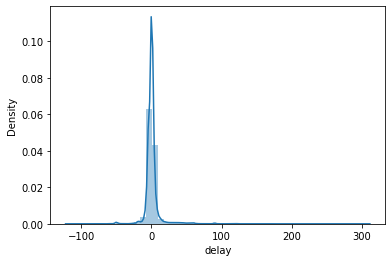

In [18]:
# to check the distribution of the target column 

sns.distplot(y_train)
#we can infer it is right 

In [19]:
y_train.min(),y_train.max()

(-118, 307)

<AxesSubplot:xlabel='delay', ylabel='total_open_amount'>

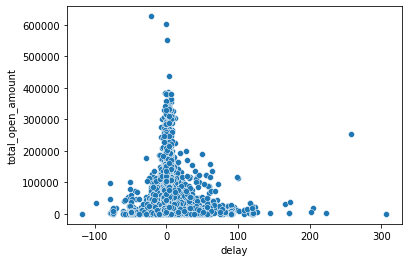

In [20]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay", y="total_open_amount")
#we can infer from the graph that it contains outliers and they should be treated accordingly.

### Outliers Detection and removal

In [21]:
mean=np.mean(y_train)       #calculating mean
std=np.std(y_train)         #calculating standard deviation 
print(mean)
print(std)

0.8678666666666667
11.239911363035247


#### Detecting number of outliers

In [22]:
#using Z score method of outlier removal  
threshold=3
outlier = []
for i in y_train:
    z= (i-mean)/std
    if z > threshold:
        outlier.append(i)
#print(outlier)
len(outlier)

577

#### IQR method of removal of outliers

In [23]:
X_train = X_train.merge(y_train,on = X_train.index)
Q1=y_train.quantile(0.25)
Q3=y_train.quantile(0.75)
print(Q1,Q3)

-3.0 2.0


In [24]:
IQR=Q3-Q1
IQR

5.0

In [25]:
lower_limit= Q1-1.5*IQR     #calculating the upper and lower bound
upper_limit= Q3+1.5*IQR
lower_limit,upper_limit

(-10.5, 9.5)

In [26]:
# main_train_x = X_train[((y_train<lower_limit)&(y_train>upper_limit))]
X_train =  X_train[(X_train["delay"]>lower_limit)]
X_train =  X_train[(X_train["delay"]<upper_limit)]
print(X_train.delay.min(),X_train.delay.max(),X_train.delay.mean(),X_train.shape)
y_train = X_train.delay
X_train = X_train.drop(columns=["key_0","delay"])

-10 9 -0.298822339426342 (27682, 12)


In [27]:
X_train.merge(y_train,on = X_train.index)

,key_0,business_code,name_customer,clear_date,buisness_year,posting_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,isOpen,delay
0,0,U001,WEGMAN,2019-02-26,2019.0,2019-02-11,2019-02-26,USD,13734.56,NAA8,0,0
1,1,U001,C&S WH associates,2019-04-25,2019.0,2019-04-11,2019-04-26,USD,11111.14,NAC6,0,-1
2,2,U001,SYSCO us,2019-05-06,2019.0,2019-04-18,2019-05-03,USD,8157.67,NAA8,0,3
3,3,U001,WAL-MAR,2019-07-03,2019.0,2019-06-22,2019-07-07,USD,45057.46,NAH4,0,-4
4,4,U001,M B corp,2019-11-20,2019.0,2019-10-18,2019-11-19,USD,41620.08,NA32,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
27677,29995,U001,DOT corp,2019-10-07,2019.0,2019-09-22,2019-10-07,USD,5365.42,NAA8,0,0
27678,29996,U001,GORDO corporation,2019-07-05,2019.0,2019-05-29,2019-06-29,USD,21209.09,NA3B,0,6
27679,29997,U001,M B llc,2019-05-10,2019.0,2019-04-17,2019-05-07,USD,21866.13,NAD1,0,3
27680,29998,U001,DEC foundation,2020-02-14,2020.0,2020-02-07,2020-02-24,USD,583.31,NAM4,0,-10


# Feature Engineering

In [28]:
X_train.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27682 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   business_code       27682 non-null  object        
 1   name_customer       27682 non-null  object        
 2   clear_date          27682 non-null  datetime64[ns]
 3   buisness_year       27682 non-null  float64       
 4   posting_date        27682 non-null  datetime64[ns]
 5   due_in_date         27682 non-null  datetime64[ns]
 6   invoice_currency    27682 non-null  object        
 7   total_open_amount   27682 non-null  float64       
 8   cust_payment_terms  27682 non-null  object        
 9   isOpen              27682 non-null  int64         
dtypes: datetime64[ns](3), float64(2), int64(1), object(4)
memory usage: 2.3+ MB


### Label Encoding some columns

In [29]:
from sklearn.preprocessing import LabelEncoder            #encoding business_code to int format so that it is useful to our model
business_code_encoder = LabelEncoder()
business_code_encoder.fit(X_train['business_code'])
X_train['business_code_enc'] = business_code_encoder.transform(X_train['business_code'])

In [30]:
X_train[['business_code_enc','business_code']]

,business_code_enc,business_code
0,1,U001
1,1,U001
2,1,U001
3,1,U001
4,1,U001
...,...,...
29995,1,U001
29996,1,U001
29997,1,U001
29998,1,U001


In [31]:
X_val['business_code_enc'] = business_code_encoder.transform(X_val['business_code'])     #performing same on val and test set also
X_test['business_code_enc'] = business_code_encoder.transform(X_test['business_code'])

In [32]:
X_train[['business_code_enc','business_code']]

,business_code_enc,business_code
0,1,U001
1,1,U001
2,1,U001
3,1,U001
4,1,U001
...,...,...
29995,1,U001
29996,1,U001
29997,1,U001
29998,1,U001


In [33]:
X_train.drop(['business_code'], axis =1,inplace=True)  #dropping business_code and using encoded one 
X_val.drop(['business_code'],axis=1 , inplace=True)
X_test.drop(['business_code'],axis=1 , inplace=True)

In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27682 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   name_customer       27682 non-null  object        
 1   clear_date          27682 non-null  datetime64[ns]
 2   buisness_year       27682 non-null  float64       
 3   posting_date        27682 non-null  datetime64[ns]
 4   due_in_date         27682 non-null  datetime64[ns]
 5   invoice_currency    27682 non-null  object        
 6   total_open_amount   27682 non-null  float64       
 7   cust_payment_terms  27682 non-null  object        
 8   isOpen              27682 non-null  int64         
 9   business_code_enc   27682 non-null  int32         
dtypes: datetime64[ns](3), float64(2), int32(1), int64(1), object(3)
memory usage: 2.2+ MB


### Label encoding invoice_currency

In [35]:
invoice_currency_encoder = LabelEncoder()                                           #Label encoding invoice_currency also 
invoice_currency_encoder.fit(X_train['invoice_currency'])

X_train['invoice_currency_enc'] = invoice_currency_encoder.transform(X_train['invoice_currency'])  #performing same on train,val,split
X_val['invoice_currency_enc'] = invoice_currency_encoder.transform(X_val['invoice_currency'])
X_test['invoice_currency_enc'] = invoice_currency_encoder.transform(X_test['invoice_currency'])

In [36]:
X_train[['invoice_currency_enc','invoice_currency']]

,invoice_currency_enc,invoice_currency
0,1,USD
1,1,USD
2,1,USD
3,1,USD
4,1,USD
...,...,...
29995,1,USD
29996,1,USD
29997,1,USD
29998,1,USD


In [37]:
X_train.drop(['invoice_currency'], axis =1,inplace=True)
X_val.drop(['invoice_currency'],axis=1 , inplace=True)
X_test.drop(['invoice_currency'],axis=1 , inplace=True)

In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27682 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name_customer         27682 non-null  object        
 1   clear_date            27682 non-null  datetime64[ns]
 2   buisness_year         27682 non-null  float64       
 3   posting_date          27682 non-null  datetime64[ns]
 4   due_in_date           27682 non-null  datetime64[ns]
 5   total_open_amount     27682 non-null  float64       
 6   cust_payment_terms    27682 non-null  object        
 7   isOpen                27682 non-null  int64         
 8   business_code_enc     27682 non-null  int32         
 9   invoice_currency_enc  27682 non-null  int32         
dtypes: datetime64[ns](3), float64(2), int32(2), int64(1), object(2)
memory usage: 2.1+ MB


### Label encoding cust_payment_terms

In [39]:
cust_payment_terms_encoder = LabelEncoder()                                           #Label encoding cust_payment_terms also 
cust_payment_terms_encoder.fit(X_train['cust_payment_terms'])

X_train['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(X_train['cust_payment_terms'])  #performing same on train,val,split
#X_val['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(X_val['cust_payment_terms'])
#X_test['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(X_test['cust_payment_terms'])

In [40]:
X_train.drop(['cust_payment_terms'], axis =1,inplace=True)

In [41]:
# finding what are the new catagories in the validation set
diff = set(X_val['cust_payment_terms'])-set(cust_payment_terms_encoder.classes_)  #for adding unseen values

# adding them to the classess variable // 
for items in diff:
    cust_payment_terms_encoder.classes_ = np.append(cust_payment_terms_encoder.classes_,items)
    
    
diff = set(X_test['cust_payment_terms'])-set(cust_payment_terms_encoder.classes_)  #for adding unseen values

for items in diff:
    cust_payment_terms_encoder.classes_ = np.append(cust_payment_terms_encoder.classes_,items)

In [42]:
X_val['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(X_test['cust_payment_terms'])

In [43]:
X_val.drop(['cust_payment_terms'],axis=1 , inplace=True)
X_test.drop(['cust_payment_terms'],axis=1 , inplace=True)

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27682 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name_customer           27682 non-null  object        
 1   clear_date              27682 non-null  datetime64[ns]
 2   buisness_year           27682 non-null  float64       
 3   posting_date            27682 non-null  datetime64[ns]
 4   due_in_date             27682 non-null  datetime64[ns]
 5   total_open_amount       27682 non-null  float64       
 6   isOpen                  27682 non-null  int64         
 7   business_code_enc       27682 non-null  int32         
 8   invoice_currency_enc    27682 non-null  int32         
 9   cust_payment_terms_enc  27682 non-null  int32         
dtypes: datetime64[ns](3), float64(2), int32(3), int64(1), object(1)
memory usage: 2.0+ MB


## Target encoding name_customer

In [45]:
#replacing name_customer value with the mean of the target variable.
#to get a more close relation.
means = X_train.merge(y_train , on = X_train.index ).groupby('name_customer')['delay'].mean()
means_val = X_val.merge(y_val , on = X_val.index ).groupby('name_customer')['delay'].mean()
means_test = X_test.merge(y_test , on = X_test.index ).groupby('name_customer')['delay'].mean()
means

name_customer
11078 llc             7.0
17135 in             -2.0
17135 systems         6.0
236008 trust         -8.0
99 CE co              1.0
                     ... 
Y H llc              -2.0
YAEGER corporation    9.0
YEN BROS              0.0
YEN BROS corp         0.0
YEN BROS llc         -2.0
Name: delay, Length: 3156, dtype: float64

In [46]:
X_train['name_customer'] = X_train['name_customer'].map(means)
X_val['name_customer'] = X_val['name_customer'].map(means_val)
X_test['name_customer'] = X_test['name_customer'].map(means_test)
X_train["name_customer"]

0        0.571429
1        0.414286
2        1.700000
3       -2.475535
4        1.300000
           ...   
29995    0.038462
29996   -0.352941
29997    2.888889
29998   -4.538462
29999    1.592593
Name: name_customer, Length: 27682, dtype: float64

<AxesSubplot:xlabel='delay', ylabel='name_customer'>

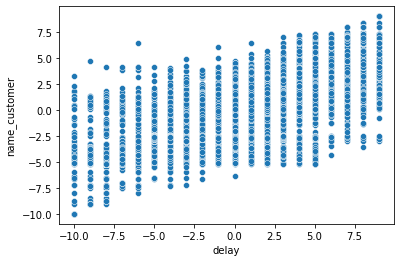

In [47]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay", y="name_customer")

#we can infer a linear relation from the given graph i.e it may be a feature to be considered 

In [48]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27682 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name_customer           27682 non-null  float64       
 1   clear_date              27682 non-null  datetime64[ns]
 2   buisness_year           27682 non-null  float64       
 3   posting_date            27682 non-null  datetime64[ns]
 4   due_in_date             27682 non-null  datetime64[ns]
 5   total_open_amount       27682 non-null  float64       
 6   isOpen                  27682 non-null  int64         
 7   business_code_enc       27682 non-null  int32         
 8   invoice_currency_enc    27682 non-null  int32         
 9   cust_payment_terms_enc  27682 non-null  int32         
dtypes: datetime64[ns](3), float64(3), int32(3), int64(1)
memory usage: 2.0 MB


In [49]:
# #extract day,month and year from clear date

# X_train['clear_day'] = X_train['clear_date'].dt.day
# X_train['clear_month'] = X_train['clear_date'].dt.month
# X_train['clear_year'] = X_train['clear_date'].dt.year

# X_val['clear_day'] = X_val['clear_date'].dt.day
# X_val['clear_month'] = X_val['clear_date'].dt.month
# X_val['clear_year'] = X_val['clear_date'].dt.year


# X_test['clear_day'] = X_test['clear_date'].dt.day
# X_test['clear_month'] = X_test['clear_date'].dt.month
# X_test['clear_year'] = X_test['clear_date'].dt.year

In [50]:
X_train.drop(['clear_date'], axis =1,inplace=True)  #dropping clear_date as we have extracted info from it
X_val.drop(['clear_date'],axis=1 , inplace=True)
X_test.drop(['clear_date'],axis=1 , inplace=True)

In [51]:
X_train.drop(['posting_date'], axis =1,inplace=True)  #dropping posting_date as it does not provide any info to delay
X_val.drop(['posting_date'],axis=1 , inplace=True)
X_test.drop(['posting_date'],axis=1 , inplace=True)

X_train.drop(['due_in_date'], axis =1,inplace=True)  #dropping due_in_date as it does not provide any info to delay
X_val.drop(['due_in_date'],axis=1 , inplace=True)
X_test.drop(['due_in_date'],axis=1 , inplace=True)

In [52]:
X_train

,name_customer,buisness_year,total_open_amount,isOpen,business_code_enc,invoice_currency_enc,cust_payment_terms_enc
0,0.571429,2019.0,13734.56,0,1,1,20
1,0.414286,2019.0,11111.14,0,1,1,25
2,1.700000,2019.0,8157.67,0,1,1,20
3,-2.475535,2019.0,45057.46,0,1,1,34
4,1.300000,2019.0,41620.08,0,1,1,13
...,...,...,...,...,...,...,...
29995,0.038462,2019.0,5365.42,0,1,1,20
29996,-0.352941,2019.0,21209.09,0,1,1,15
29997,2.888889,2019.0,21866.13,0,1,1,28
29998,-4.538462,2020.0,583.31,0,1,1,38


# Feature Selection


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

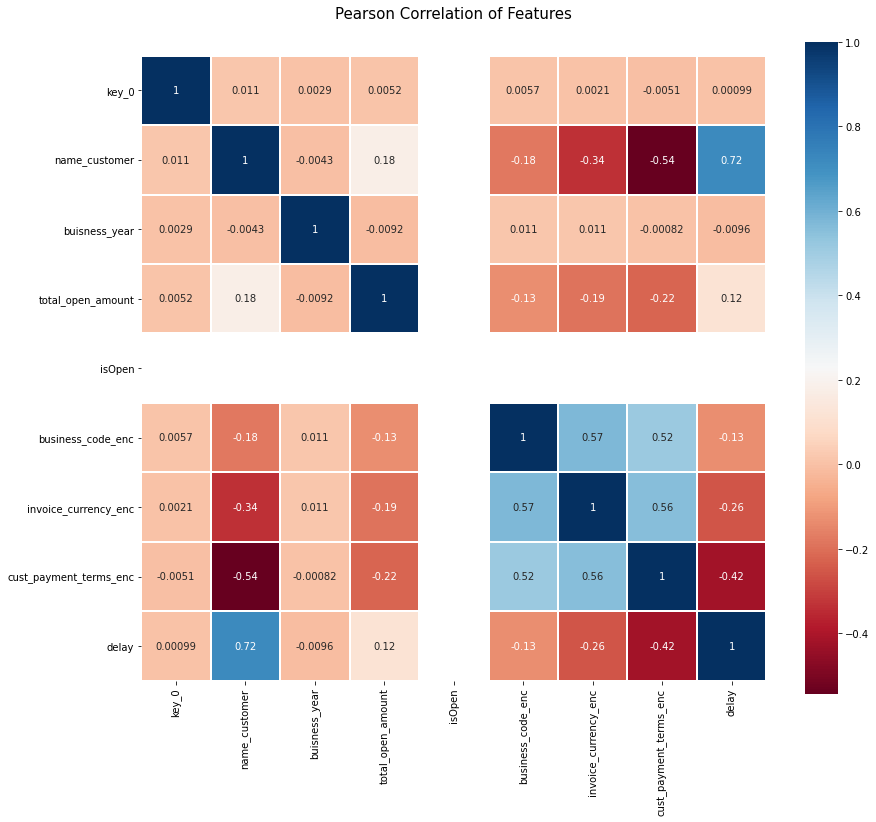

In [53]:
#corrmat = X_train.merge(y_train , on = X_train.index).corr()
# plt.subplots(figsize=(12,9))
# sns.heatmap(corrmat, vmax=0.9, square=True)


colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [54]:
# here we can see isOpen is a constant column hence should be dropped
# also name customer shows 72% relation with our delay 

In [55]:
X_train.drop(['isOpen'], axis =1,inplace=True)  #dropping isOpen as it does not provide any info to delay
X_val.drop(['isOpen'],axis=1 , inplace=True)
X_test.drop(['isOpen'],axis=1 , inplace=True)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

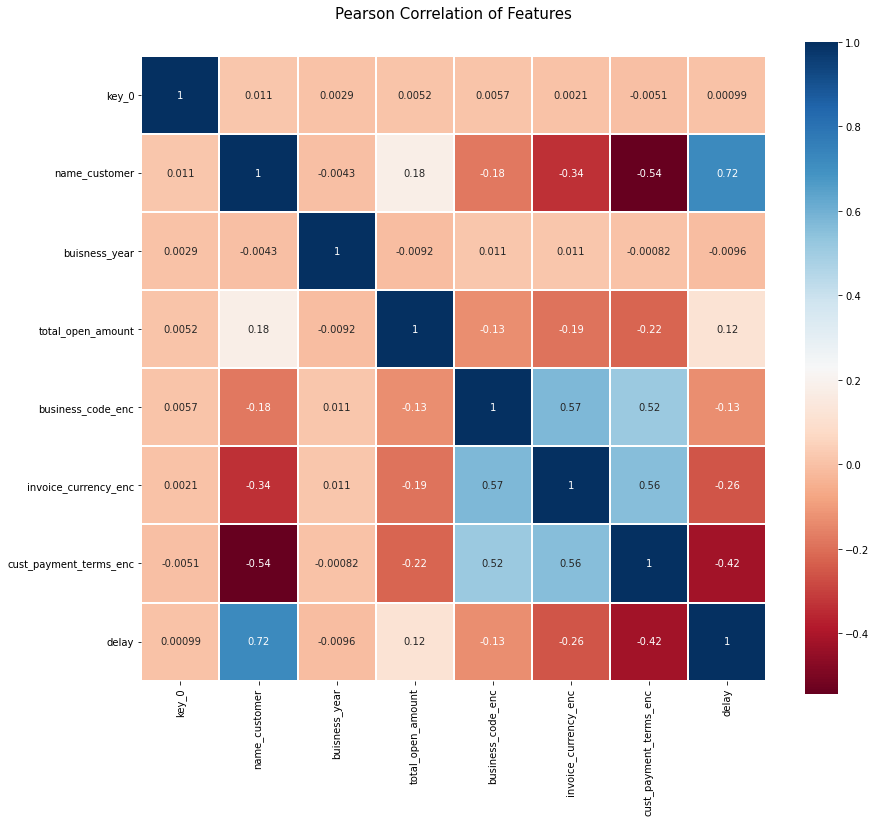

In [56]:
#checking the heatmap again after dropping the isOpen column

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27682 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name_customer           27682 non-null  float64
 1   buisness_year           27682 non-null  float64
 2   total_open_amount       27682 non-null  float64
 3   business_code_enc       27682 non-null  int32  
 4   invoice_currency_enc    27682 non-null  int32  
 5   cust_payment_terms_enc  27682 non-null  int32  
dtypes: float64(3), int32(3)
memory usage: 1.2 MB


In [58]:
from sklearn.feature_selection import VarianceThreshold  # calculating variance threshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [59]:
sel.variances_

array([5.75324349e+00, 1.15159660e-01, 1.64292766e+09, 2.32158852e-01,
       6.97693550e-02, 9.78210083e+01])

# MODELLING

### Liner Regression model

In [60]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression(fit_intercept=True,
    normalize=False,
    copy_X=True,
    n_jobs=10,
    positive=False,)
base_model.fit(X_train, y_train)       #fitting value on train 

LinearRegression(n_jobs=10)

In [61]:
y_predict = base_model.predict(X_val)    #predicting on x_val

In [62]:
from sklearn.metrics import mean_squared_error          #calculating rmse value

mse=mean_squared_error(y_val,y_predict, squared=False)
#print(mse)
rmse=math.sqrt(mse)
print(rmse)

2.666655874257084


In [63]:
from sklearn.metrics import r2_score
r2_score(y_val, y_predict)

0.5898166434211851

### Tree based model

In [64]:
from sklearn.tree import DecisionTreeRegressor   #we triend several values in max depth of decision tree 
regressor = DecisionTreeRegressor(               #but on hit and trial of values between 0-10 we found 5 was the most suitable value
    criterion='mse',                             #which somewhat leads to an acceptable rmse value
    splitter='best',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    ccp_alpha=0.0,
)

In [65]:
regressor.fit(X_train, y_train)      #fitting value on train 

DecisionTreeRegressor(max_depth=5)

In [66]:
y_predict2 = regressor.predict(X_val)  #predicting on x_val

In [67]:
mse=mean_squared_error(y_val,y_predict2, squared=False)  #calculating rmse value
#print(mse) 
rmse=math.sqrt(mse)
print(rmse)
r2_score(y_val, y_predict2)

3.099594221840485


0.2512626350200743

## SVR Model

In [68]:
from sklearn.svm import SVR                    #creating the model 
SVRregressor = SVR(kernel='rbf')               #SVR goes through the plots and find the best fitting line with most points 
SVRregressor.fit(X_train,y_train)              # used when data is not in linear fashion

SVR()

In [69]:
y_predict3 = SVRregressor.predict(X_val)      #predicting the values

In [70]:
mse=mean_squared_error(y_val,y_predict3, squared=False)  #calculating mse value
#print(mse) 
rmse=math.sqrt(mse)                                      #for root of mse value
print(rmse)
r2_score(y_val, y_predict3)

3.336605297191689


-0.005378227693666693

## XG Boost Model

In [71]:
from xgboost.sklearn import XGBRegressor          # decision tree based model

model = XGBRegressor(n_estimators=10, max_depth=10, learning_rate=0.001)
# Fit the Model
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.001, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [72]:
y_predict4 = regressor.predict(X_val)

In [73]:
mse=mean_squared_error(y_val,y_predict4, squared=False)  #calculating rmse value
#print(mse) 
rmse=math.sqrt(mse)
print(rmse)
r2_score(y_val, y_predict4)

3.099594221840485


0.2512626350200743

# INFERENCE from the above 3 models

In [74]:
#Since on comparing the r2_value of above four models i.e Linear Reg, Tree based, SVM model, XG Boost model
#We can clearly infer that from linear regression model has the highest rsquare value of 58% and for others it is somewhat 
#25% or so 
# WE choose LINEAR REGRESSION Model.

In [75]:
y_predict_test = regressor.predict(X_test)
mse=mean_squared_error(y_test, y_predict_test, squared=False)
rmse=math.sqrt(mse)
print(rmse)

2.874885945322642


### Performing the operations on main test data i.e where clear date= Null

In [76]:
test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930724e+09,2020-03-31,20200331,20200331,20200415.0,USD,RV,1.0,NaN,15488.14,20200331.0,NAH4,1.930724e+09,1
1,U001,0200803720,DEC corp,NaN,2020.0,1.930818e+09,2020-04-23,20200423,20200423,20200509.0,USD,RV,1.0,NaN,3210.00,20200416.0,NAM4,1.930818e+09,1
2,CA02,140104409,LOB llc,NaN,2020.0,2.960625e+09,2020-03-28,20200329,20200328,20200408.0,CAD,RV,1.0,NaN,202691.98,20200329.0,CA10,2.960625e+09,1
3,U001,0200592182,DECA corporation,NaN,2020.0,1.930624e+09,2020-03-09,20200309,20200309,20200324.0,USD,RV,1.0,NaN,3073.47,20200301.0,NAM4,1.930624e+09,1
4,U001,0200799180,CHEN associates,NaN,2020.0,1.930706e+09,2020-03-31,20200330,20200331,20200420.0,USD,RV,1.0,NaN,32197.99,20200331.0,NAD1,1.930706e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,U001,200769623,WAL-MAR,NaN,2020.0,1.930857e+09,2020-05-07,20200504,20200507,20200522.0,USD,RV,1.0,NaN,1346.60,20200507.0,NAH4,1.930857e+09,1
9996,U001,0200744019,TARG co,NaN,2020.0,1.930779e+09,2020-04-13,20200412,20200413,20200428.0,USD,RV,1.0,NaN,67561.36,20200413.0,NAA8,1.930779e+09,1
9997,U001,0200726979,BJ'S co,NaN,2020.0,1.930646e+09,2020-03-12,20200312,20200312,20200327.0,USD,RV,1.0,NaN,55.21,20200312.0,NAA8,1.930646e+09,1
9998,U001,CCU013,KRAFT F systems,NaN,2020.0,1.930686e+09,2020-03-27,20200323,20200327,20200327.0,USD,RV,1.0,NaN,14095.58,20200327.0,NAX2,1.930686e+09,1


In [77]:
test.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             10000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

In [78]:
business_code_encoder.classes_,invoice_currency_encoder.classes_,cust_payment_terms_encoder.classes_,means


(array(['CA02', 'U001', 'U002', 'U005', 'U007', 'U013'], dtype=object),
 array(['CAD', 'USD'], dtype=object),
 array(['90M7', 'B052', 'B112', 'BR12', 'BR56', 'C106', 'CA10', 'CA30',
        'CAB1', 'CAX2', 'NA10', 'NA25', 'NA31', 'NA32', 'NA38', 'NA3B',
        'NA3F', 'NA84', 'NA8Q', 'NA9X', 'NAA8', 'NAAW', 'NAAX', 'NAB1',
        'NABG', 'NAC6', 'NACB', 'NACE', 'NAD1', 'NAD4', 'NAD5', 'NAD8',
        'NAG2', 'NAGD', 'NAH4', 'NAM1', 'NAM2', 'NAM3', 'NAM4', 'NATJ',
        'NATK', 'NATM', 'NATU', 'NATV', 'NATX', 'NAU5', 'NAUN', 'NAUP',
        'NAUZ', 'NAV9', 'NAVC', 'NAVD', 'NAVE', 'NAVF', 'NAVL', 'NAVM',
        'NAVQ', 'NAVR', 'NAWM', 'NAWN', 'NAWP', 'NAWU', 'NAX2', 'NATH',
        'NATW', 'BR60', 'NAUX'], dtype=object),
 name_customer
 11078 llc             7.0
 17135 in             -2.0
 17135 systems         6.0
 236008 trust         -8.0
 99 CE co              1.0
                      ... 
 Y H llc              -2.0
 YAEGER corporation    9.0
 YEN BROS              0.0
 YEN BRO

In [79]:
test['customer_name']=test["name_customer"]

In [80]:
# finding what are the new catagories in the test set
diff = set(test['cust_payment_terms'])-set(cust_payment_terms_encoder.classes_)  #for adding unseen values

# adding them to the classess variable // 
for items in diff:
    cust_payment_terms_encoder.classes_ = np.append(cust_payment_terms_encoder.classes_,items)
    
test['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(test['cust_payment_terms'])  #performing same on train,val,split
test['invoice_currency_enc'] = invoice_currency_encoder.transform(test['invoice_currency'])  #performing same on train,val,split
test['business_code_enc'] = business_code_encoder.transform(test['business_code'])
test['name_customer'] = test['name_customer'].map(means)
# test['name_customer'].mean()
test['name_customer'].fillna(test['name_customer'].mean(),inplace=True)


In [81]:
# #extract day,month and year from clear date
# test['clear_date']=pd.to_datetime(test['clear_date'])
# test['clear_day'] = test['clear_date'].dt.day
# test['clear_month'] = test['clear_date'].dt.month
# test['clear_year'] = test['clear_date'].dt.year
test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,customer_name,cust_payment_terms_enc,invoice_currency_enc,business_code_enc
0,U001,0200769623,-2.606928,NaN,2020.0,1.930724e+09,2020-03-31,20200331,20200331,20200415.0,...,NaN,15488.14,20200331.0,NAH4,1.930724e+09,1,WAL-MAR corporation,34,1,1
1,U001,0200803720,-4.691176,NaN,2020.0,1.930818e+09,2020-04-23,20200423,20200423,20200509.0,...,NaN,3210.00,20200416.0,NAM4,1.930818e+09,1,DEC corp,38,1,1
2,CA02,140104409,0.666667,NaN,2020.0,2.960625e+09,2020-03-28,20200329,20200328,20200408.0,...,NaN,202691.98,20200329.0,CA10,2.960625e+09,1,LOB llc,6,0,0
3,U001,0200592182,-5.170732,NaN,2020.0,1.930624e+09,2020-03-09,20200309,20200309,20200324.0,...,NaN,3073.47,20200301.0,NAM4,1.930624e+09,1,DECA corporation,38,1,1
4,U001,0200799180,6.500000,NaN,2020.0,1.930706e+09,2020-03-31,20200330,20200331,20200420.0,...,NaN,32197.99,20200331.0,NAD1,1.930706e+09,1,CHEN associates,28,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,U001,200769623,-2.475535,NaN,2020.0,1.930857e+09,2020-05-07,20200504,20200507,20200522.0,...,NaN,1346.60,20200507.0,NAH4,1.930857e+09,1,WAL-MAR,34,1,1
9996,U001,0200744019,1.133333,NaN,2020.0,1.930779e+09,2020-04-13,20200412,20200413,20200428.0,...,NaN,67561.36,20200413.0,NAA8,1.930779e+09,1,TARG co,20,1,1
9997,U001,0200726979,0.901786,NaN,2020.0,1.930646e+09,2020-03-12,20200312,20200312,20200327.0,...,NaN,55.21,20200312.0,NAA8,1.930646e+09,1,BJ'S co,20,1,1
9998,U001,CCU013,-0.367513,NaN,2020.0,1.930686e+09,2020-03-27,20200323,20200327,20200327.0,...,NaN,14095.58,20200327.0,NAX2,1.930686e+09,1,KRAFT F systems,62,1,1


In [82]:
test.drop(['doc_id', 'document_create_date','document_create_date.1','baseline_create_date','posting_id','document type','clear_date','isOpen','business_code','invoice_currency','area_business'], axis='columns', inplace=True) #dropping these columns as they dont provide any info about delay   
test 

,cust_number,name_customer,buisness_year,posting_date,due_in_date,total_open_amount,cust_payment_terms,invoice_id,customer_name,cust_payment_terms_enc,invoice_currency_enc,business_code_enc
0,0200769623,-2.606928,2020.0,2020-03-31,20200415.0,15488.14,NAH4,1.930724e+09,WAL-MAR corporation,34,1,1
1,0200803720,-4.691176,2020.0,2020-04-23,20200509.0,3210.00,NAM4,1.930818e+09,DEC corp,38,1,1
2,140104409,0.666667,2020.0,2020-03-28,20200408.0,202691.98,CA10,2.960625e+09,LOB llc,6,0,0
3,0200592182,-5.170732,2020.0,2020-03-09,20200324.0,3073.47,NAM4,1.930624e+09,DECA corporation,38,1,1
4,0200799180,6.500000,2020.0,2020-03-31,20200420.0,32197.99,NAD1,1.930706e+09,CHEN associates,28,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,200769623,-2.475535,2020.0,2020-05-07,20200522.0,1346.60,NAH4,1.930857e+09,WAL-MAR,34,1,1
9996,0200744019,1.133333,2020.0,2020-04-13,20200428.0,67561.36,NAA8,1.930779e+09,TARG co,20,1,1
9997,0200726979,0.901786,2020.0,2020-03-12,20200327.0,55.21,NAA8,1.930646e+09,BJ'S co,20,1,1
9998,CCU013,-0.367513,2020.0,2020-03-27,20200327.0,14095.58,NAX2,1.930686e+09,KRAFT F systems,62,1,1


In [83]:
delay=base_model.predict(test[['cust_payment_terms_enc','invoice_currency_enc','business_code_enc','name_customer','buisness_year','total_open_amount']])
delay   #calculating delay days


array([ -212.19307572,    14.52996561, -3640.84944559, ...,
          55.21366487,  -159.54377423,  -722.86420513])

In [84]:
test["delay"]=delay

In [85]:
test['predicted_date']=pd.to_timedelta(test['delay'],unit="D")+pd.to_datetime(test['due_in_date'], format="%Y%m%d")

In [86]:
test['predicted_date']

0      2019-09-15 19:21:58.258224000
1      2020-05-23 12:43:09.028876800
2      2010-04-20 03:36:47.901283200
3      2020-04-09 22:44:58.837084800
4      2018-11-16 12:57:05.951462400
                    ...             
9995   2020-07-05 19:44:30.377875200
9996   2017-02-11 10:26:52.167609600
9997   2020-05-21 05:07:40.645027200
9998   2019-10-19 10:56:57.906700800
9999   2018-04-05 03:15:32.676768000
Name: predicted_date, Length: 10000, dtype: datetime64[ns]

In [87]:
test['due_in_date' ]=pd.to_datetime(test['due_in_date'],format='%Y%m%d')


In [92]:
test["invoice_id"] = test["invoice_id"].astype(float).astype(int)

In [93]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             10000 non-null  object        
 1   name_customer           10000 non-null  float64       
 2   buisness_year           10000 non-null  float64       
 3   posting_date            10000 non-null  object        
 4   due_in_date             10000 non-null  datetime64[ns]
 5   total_open_amount       10000 non-null  float64       
 6   cust_payment_terms      10000 non-null  object        
 7   invoice_id              10000 non-null  int32         
 8   customer_name           10000 non-null  object        
 9   cust_payment_terms_enc  10000 non-null  int32         
 10  invoice_currency_enc    10000 non-null  int32         
 11  business_code_enc       10000 non-null  int32         
 12  delay                   10000 non-null  float64

In [94]:
test.to_csv('final1.csv')